### Authors:

Marek Szydłowski 136633<br>
Wojciech Tomczak 145467

Link to the source code: https://github.com/Vosloo/evolutionary-computation-labs

In [1]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd

from multiprocessing import Pool
import pickle

from IPython.display import display, Markdown

In [2]:
module_path = Path.cwd().parent
if module_path not in sys.path:
    sys.path.append(str(module_path))

In [3]:
from src.tsp_problem import TSPProblem
from src.algorithms.methods import Method
from src.visualization import Visualizer

In [4]:
problem = TSPProblem(no_runs=1)

Loaded 4 instances: TSPA, TSPB, TSPC, TSPD
Available methods: ['RANDOM_SEQUENCE', 'NEAREST', 'GREEDY_CYCLE', 'GREEDY_REGRET', 'GREEDY_REGRET_WEIGHTED', 'LOCAL_SEARCH_STEEPEST_NODES_RANDOM', 'LOCAL_SEARCH_STEEPEST_NODES_HEURISTIC', 'LOCAL_SEARCH_STEEPEST_EDGES_RANDOM', 'LOCAL_SEARCH_STEEPEST_EDGES_HEURISTIC', 'LOCAL_SEARCH_GREEDY_NODES_RANDOM', 'LOCAL_SEARCH_GREEDY_NODES_HEURISTIC', 'LOCAL_SEARCH_GREEDY_EDGES_RANDOM', 'LOCAL_SEARCH_GREEDY_EDGES_HEURISTIC', 'LOCAL_SEARCH_CANDIDATES_RANDOM', 'LOCAL_SEARCH_CANDIDATES_HEURISTIC', 'LOCAL_SEARCH_MOVES_RANDOM', 'LOCAL_SEARCH_MSLS', 'LOCAL_SEARCH_ITERATIVE', 'LOCAL_SEARCH_LSN_NO_LS', 'LOCAL_SEARCH_LSN_WITH_LS']


In [5]:
grades = problem.run(
    ["TSPC", "TSPD"],
    [
        Method.LOCAL_SEARCH_LSN_NO_LS,
        Method.LOCAL_SEARCH_LSN_WITH_LS,
    ],
)


Running TSPC instance
Running LOCAL_SEARCH_LSN_NO_LS method for 1 runs
  1 /   1
No. runs: 684
Finished LOCAL_SEARCH_LSN_NO_LS method in 105.00s
Running LOCAL_SEARCH_LSN_WITH_LS method for 1 runs
  1 /   1
No. runs: 220
Finished LOCAL_SEARCH_LSN_WITH_LS method in 105.06s

Running TSPD instance
Running LOCAL_SEARCH_LSN_NO_LS method for 1 runs
  1 /   1
No. runs: 671
Finished LOCAL_SEARCH_LSN_NO_LS method in 105.00s
Running LOCAL_SEARCH_LSN_WITH_LS method for 1 runs
  1 /   1
No. runs: 292
Finished LOCAL_SEARCH_LSN_WITH_LS method in 105.15s


In [6]:
pickle.dump(grades, open("grades.pkl", "wb"))

In [7]:
for instance_name, instance_grades in grades.items():
    print(f"\n{instance_name}:")
    print("----")
    for method_name, grade in instance_grades.items():
        meth_name = method_name.value.replace("_", " ").title()
        print(f"{meth_name}: {grade}")


TSPC:
----
Local Search Lsn No Ls: 
==================================== Grade =====================================
Method:                                 Local Search Lsn No Ls
Best run id:                            109
Best run cost:                          27700
Best run distance:                      25166
Best run score:                         52866
Min score:                              52866
Avg score:                              52866
Max score:                              52866

Local Search Lsn With Ls: 
==================================== Grade =====================================
Method:                                 Local Search Lsn With Ls
Best run id:                            172
Best run cost:                          27271
Best run distance:                      20454
Best run score:                         47725
Min score:                              47725
Avg score:                              47725
Max score:                              47725


TSP

In [8]:
nodes = {
    instance_name: problem._get_nodes(instance)
    for instance_name, instance in problem.instances.items()
    if instance_name in ("TSPC", "TSPD")
}
visualizer = Visualizer(nodes)

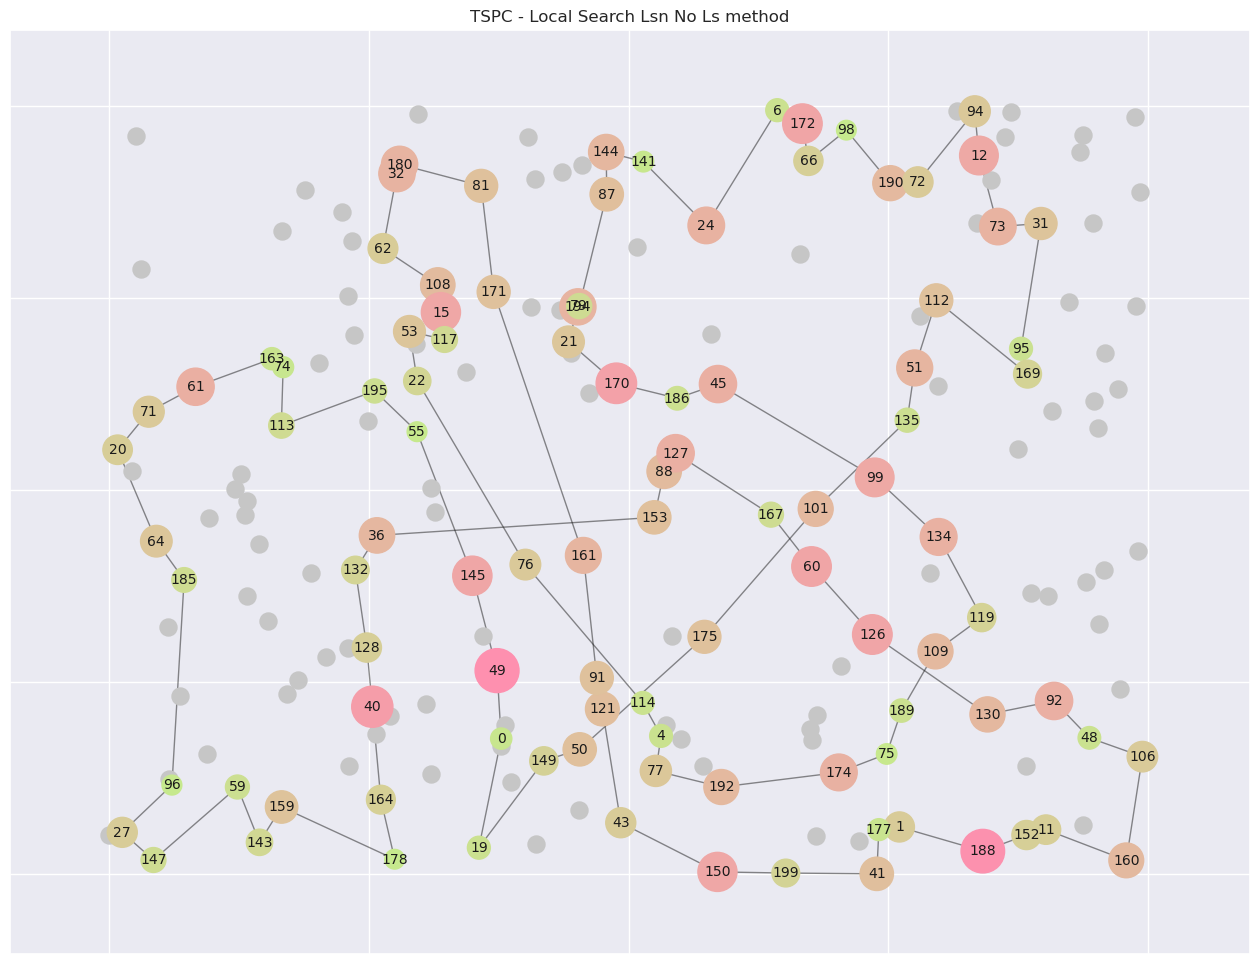

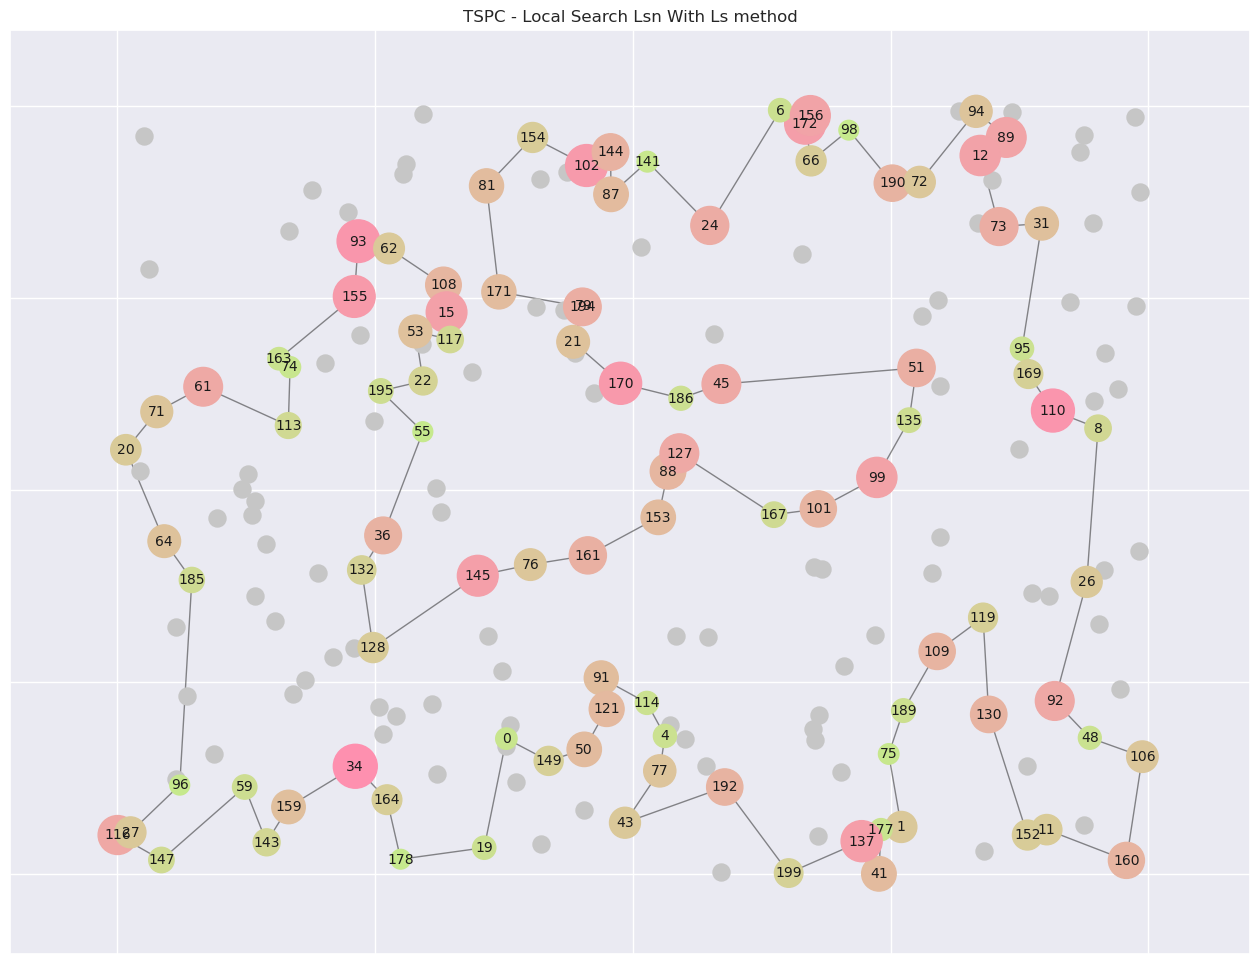

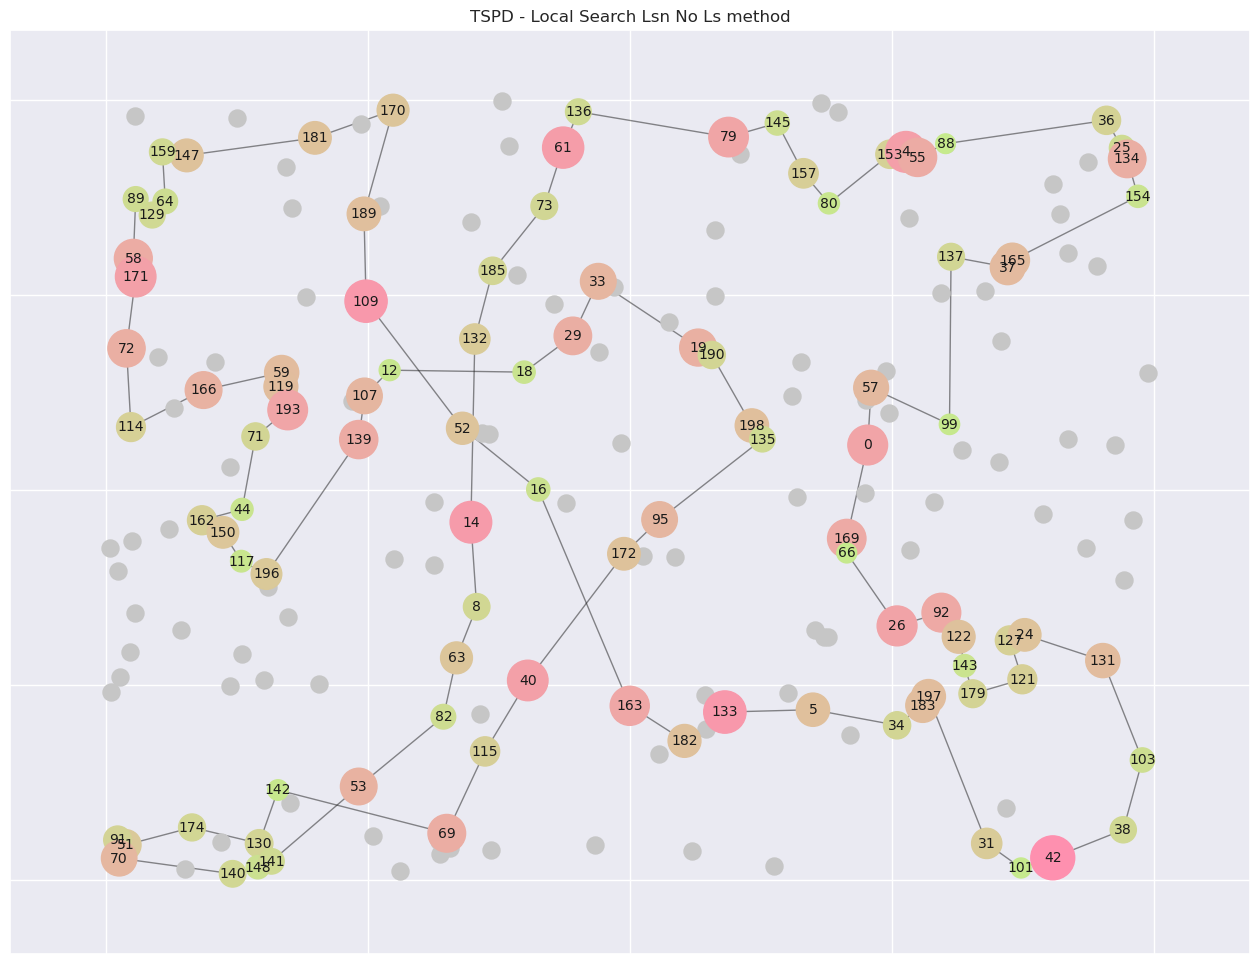

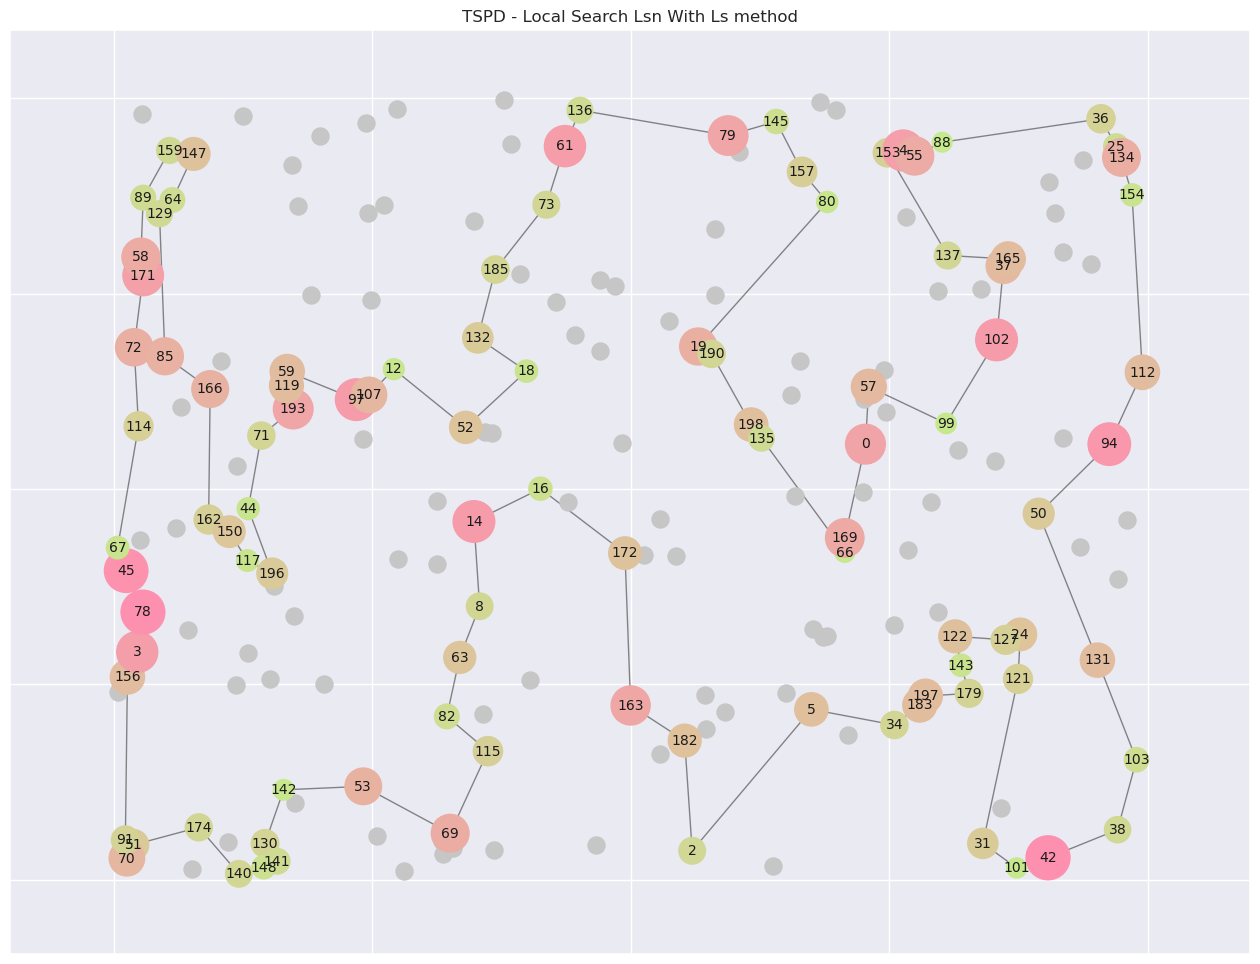

In [9]:
for instance_name, instance_grades in grades.items():
    for method_name, grade in instance_grades.items():
        visualizer.visualise_solution(grade, instance_name, method_name)

In [10]:
res = {}
for instance_name, instance_grades in grades.items():
    res[instance_name] = {}
    for method_name, grade in instance_grades.items():
        meth_name = method_name.value.replace("_", " ").title()
        res[instance_name][meth_name] = [grade.avg, grade.min, grade.max, *grade.runtime]

In [11]:
dfs = {}
for instance, methods in res.items():
    df = (
        pd.DataFrame.from_dict(
            methods,
            orient="index",
            columns=["Average Score", "Min Score", "Max Score", "Total runtime", "Per run runtime"],
        )
        .reset_index()
        .sort_values(by="Min Score")
        .reset_index(drop=True)
    )
    df.columns = [
        "Method",
        "Average Score",
        "Min Score",
        "Max Score",
        "Total runtime",
        "Per run runtime",
    ]
    df.index.name = instance
    dfs[instance] = df

In [12]:
for df in dfs.values():
    display(Markdown(df.to_markdown()))

|   TSPC | Method                   |   Average Score |   Min Score |   Max Score |   Total runtime |   Per run runtime |
|-------:|:-------------------------|----------------:|------------:|------------:|----------------:|------------------:|
|      0 | Local Search Lsn With Ls |           47725 |       47725 |       47725 |         105.06  |           105.06  |
|      1 | Local Search Lsn No Ls   |           52866 |       52866 |       52866 |         105.003 |           105.003 |

|   TSPD | Method                   |   Average Score |   Min Score |   Max Score |   Total runtime |   Per run runtime |
|-------:|:-------------------------|----------------:|------------:|------------:|----------------:|------------------:|
|      0 | Local Search Lsn With Ls |           44186 |       44186 |       44186 |         105.152 |           105.152 |
|      1 | Local Search Lsn No Ls   |           46239 |       46239 |       46239 |         105.001 |           105.001 |